In [1]:
# import numpy as np
# np.version.version
!pip install numpy==1.19

  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Running from numpy source directory.
  <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\steve\AppData\Local\Temp\pip-install-ra_noysf\numpy_4ff89f4c508a4c95a6bd88ab7c4c55ae\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\steve\AppData\Local\Temp\pip-install-ra_noysf\numpy_4ff89f4c508a4c95a6bd88ab7c4c55ae\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  
  Error compiling Cython file:
  ------------------------------------------------------------
  ...
          for i in range(1, RK_STATE_LEN):
              

In [2]:
# https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures
import pandas as pd
import numpy as np
grains_df = pd.read_csv('all_grains_data.csv')
grains_df

,ticker,commodity,date,open,high,low,close,volume
0,ZC=F,Corn,2000-07-17,182.25,182.25,178.25,179.25,19385
1,ZC=F,Corn,2000-07-18,179.00,183.25,179.00,180.75,25205
2,ZC=F,Corn,2000-07-19,180.00,182.75,178.75,182.00,17126
3,ZC=F,Corn,2000-07-20,181.50,187.00,181.00,186.00,18742
4,ZC=F,Corn,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...,...,...
34860,ZS=F,Soybean,2023-09-06,1365.50,1365.50,1359.50,1360.25,102
34861,ZS=F,Soybean,2023-09-07,1349.50,1350.00,1345.00,1345.00,310
34862,ZS=F,Soybean,2023-09-08,1339.00,1349.50,1339.00,1349.50,198
34863,ZS=F,Soybean,2023-09-11,1352.50,1352.50,1352.00,1352.50,36


In [3]:
grains_df['commodity'].unique()

array(['Corn', 'Oat', 'KC HRW Wheat', 'Rough Rice', 'Soybean Oil',
       'Soybean'], dtype=object)

In [4]:
corn_df = pd.read_csv('individual_data/Corn_data.csv')
corn_df

,date,open,high,low,close,volume
0,2000-07-17,182.25,182.25,178.25,179.25,19385
1,2000-07-18,179.00,183.25,179.00,180.75,25205
2,2000-07-19,180.00,182.75,178.75,182.00,17126
3,2000-07-20,181.50,187.00,181.00,186.00,18742
4,2000-07-21,185.50,188.00,185.00,187.75,16814
...,...,...,...,...,...,...
5786,2023-09-06,473.50,476.25,471.25,471.50,841
5787,2023-09-07,471.25,474.00,468.50,470.75,741
5788,2023-09-08,471.25,472.25,467.00,468.50,233
5789,2023-09-11,470.25,471.50,468.00,471.25,430


In [5]:
corn_dict = {}
window_size = 7
for i in range(window_size):
    corn_dict['price_'+str(7-i)+'_days_ago'] = corn_df['close'][i:-7+i].reset_index(drop=True) 
corn_dict    

{'price_7_days_ago': 0       179.25
 1       180.75
 2       182.00
 3       186.00
 4       187.75
          ...  
 5779    470.75
 5780    478.50
 5781    469.50
 5782    461.75
 5783    461.00
 Name: close, Length: 5784, dtype: float64,
 'price_6_days_ago': 0       180.75
 1       182.00
 2       186.00
 3       187.75
 4       184.50
          ...  
 5779    478.50
 5780    469.50
 5781    461.75
 5782    461.00
 5783    464.75
 Name: close, Length: 5784, dtype: float64,
 'price_5_days_ago': 0       182.00
 1       186.00
 2       187.75
 3       184.50
 4       182.75
          ...  
 5779    469.50
 5780    461.75
 5781    461.00
 5782    464.75
 5783    471.00
 Name: close, Length: 5784, dtype: float64,
 'price_4_days_ago': 0       186.00
 1       187.75
 2       184.50
 3       182.75
 4       180.50
          ...  
 5779    461.75
 5780    461.00
 5781    464.75
 5782    471.00
 5783    471.50
 Name: close, Length: 5784, dtype: float64,
 'price_3_days_ago': 0       187.75
 1  

In [6]:
X = pd.DataFrame.from_dict(corn_dict)
X

,price_7_days_ago,price_6_days_ago,price_5_days_ago,price_4_days_ago,price_3_days_ago,price_2_days_ago,price_1_days_ago
0,179.25,180.75,182.00,186.00,187.75,184.50,182.75
1,180.75,182.00,186.00,187.75,184.50,182.75,180.50
2,182.00,186.00,187.75,184.50,182.75,180.50,181.00
3,186.00,187.75,184.50,182.75,180.50,181.00,180.25
4,187.75,184.50,182.75,180.50,181.00,180.25,180.25
...,...,...,...,...,...,...,...
5779,470.75,478.50,469.50,461.75,461.00,464.75,471.00
5780,478.50,469.50,461.75,461.00,464.75,471.00,471.50
5781,469.50,461.75,461.00,464.75,471.00,471.50,470.75
5782,461.75,461.00,464.75,471.00,471.50,470.75,468.50


In [7]:
y = corn_df['close'][7:].reset_index(drop=True) 
y

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5779    471.50
5780    470.75
5781    468.50
5782    471.25
5783    476.75
Name: close, Length: 5784, dtype: float64

In [8]:
train_pct = .9
X_train = X[:int(len(X)*train_pct)]
X_test = X[int(len(X)*train_pct):]
y_train = y[:int(len(y)*train_pct)]
y_test = y[int(len(y)*train_pct):]

In [9]:
from sklearn.linear_model import LinearRegression
  
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [10]:
print (classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))
# very high coefficient of determination on the train set, lower on the test set

0.9971498308553326
0.971229819095482


In [11]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(train_mse, test_mse)
# mse considerably higher on test set than train set
# higher in general than I would have thought. maybe I should compare these scores to a simple naive prediction using 
# the previous value.

65.14954633823858 193.58699139121558


In [12]:
y_train_pred

array([183.1865224 , 180.69614961, 181.4084901 , ..., 656.58183816,
       664.93181076, 658.73352565])

In [13]:
y_train

0       180.50
1       181.00
2       180.25
3       180.25
4       179.75
         ...  
5200    658.25
5201    658.25
5202    664.50
5203    659.50
5204    657.25
Name: close, Length: 5205, dtype: float64

In [14]:
X_train = X_train.to_numpy()

In [15]:
X_train

array([[179.25, 180.75, 182.  , ..., 187.75, 184.5 , 182.75],
       [180.75, 182.  , 186.  , ..., 184.5 , 182.75, 180.5 ],
       [182.  , 186.  , 187.75, ..., 182.75, 180.5 , 181.  ],
       ...,
       [759.5 , 757.5 , 719.  , ..., 652.5 , 658.25, 658.25],
       [757.5 , 719.  , 685.  , ..., 658.25, 658.25, 664.5 ],
       [719.  , 685.  , 652.5 , ..., 658.25, 664.5 , 659.5 ]])

In [16]:
X_test = X_test.to_numpy()


In [17]:
# Build the Model
import tensorflow as tf
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 7, 1)              0         
                                                                 
 bidirectional (Bidirectiona  (None, 7, 64)            8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-traina

In [18]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-12 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.8)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimizer)
#tf.keras.losses.Huber()
# Train the model
history = model_tune.fit(X_train, y_train, epochs=160, callbacks=[lr_schedule])

Epoch 1/160
163/163 [==============================] - 7s 8ms/step - loss: 148072.8438 - lr: 1.0000e-12
Epoch 2/160
163/163 [==============================] - 1s 8ms/step - loss: 148002.9219 - lr: 1.1220e-12
Epoch 3/160
163/163 [==============================] - 1s 8ms/step - loss: 147924.3906 - lr: 1.2589e-12
Epoch 4/160
163/163 [==============================] - 1s 8ms/step - loss: 147836.2812 - lr: 1.4125e-12
Epoch 5/160
163/163 [==============================] - 1s 8ms/step - loss: 147737.6562 - lr: 1.5849e-12
Epoch 6/160
163/163 [==============================] - 1s 8ms/step - loss: 147627.0000 - lr: 1.7783e-12
Epoch 7/160
163/163 [==============================] - 1s 8ms/step - loss: 147502.8906 - lr: 1.9953e-12
Epoch 8/160
163/163 [==============================] - 1s 8ms/step - loss: 147364.0000 - lr: 2.2387e-12
Epoch 9/160
163/163 [==============================] - 1s 8ms/step - loss: 147208.2969 - lr: 2.5119e-12
Epoch 10/160
163/163 [==============================] - 1s 8ms/s

163/163 [==============================] - 1s 8ms/step - loss: 25951.3574 - lr: 6.3096e-05
Epoch 158/160
163/163 [==============================] - 1s 8ms/step - loss: 27783.9609 - lr: 7.0795e-05
Epoch 159/160
163/163 [==============================] - 1s 8ms/step - loss: 27046.9414 - lr: 7.9433e-05
Epoch 160/160
163/163 [==============================] - 1s 8ms/step - loss: 28801.9805 - lr: 8.9125e-05


(1e-12, 0.0001, 0.0, 150000.0)

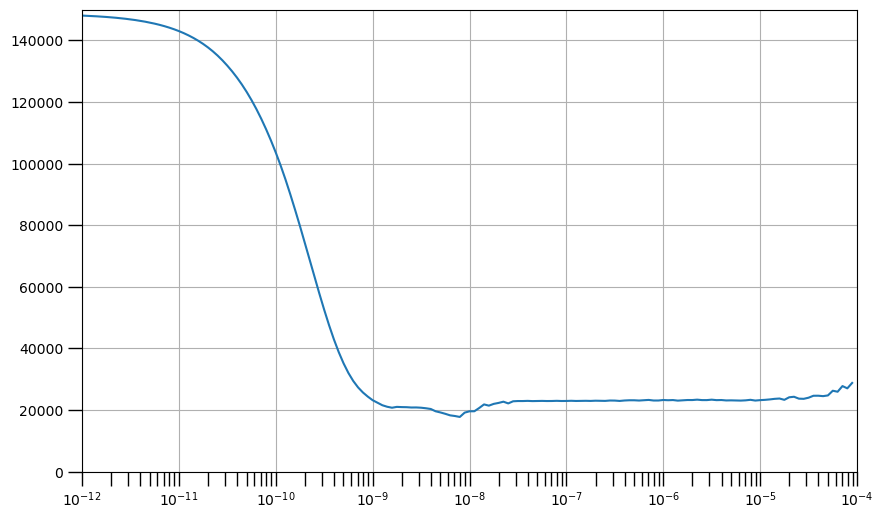

In [23]:
import matplotlib.pyplot as plt
# Define the learning rate array
lrs = 1e-12 * (10 ** (np.arange(160) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-12, 1e-4, 0, 150000])

In [24]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate based on the graph
learning_rate = 5e-10

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8)


# Set the training parameters
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mae"])

# loss=tf.keras.losses.Huber()

# Train the model
history = model.fit(X_train, y_train,epochs=300)

Epoch 1/300
163/163 [==============================] - 7s 8ms/step - loss: 116669.6172 - mae: 306.1865
Epoch 2/300
163/163 [==============================] - 1s 8ms/step - loss: 95134.2656 - mae: 268.8270
Epoch 3/300
163/163 [==============================] - 1s 8ms/step - loss: 78948.5938 - mae: 236.8250
Epoch 4/300
163/163 [==============================] - 1s 8ms/step - loss: 66376.2109 - mae: 208.6827
Epoch 5/300
163/163 [==============================] - 1s 8ms/step - loss: 56621.2617 - mae: 184.5426
Epoch 6/300
163/163 [==============================] - 1s 8ms/step - loss: 49051.9570 - mae: 167.2776
Epoch 7/300
163/163 [==============================] - 1s 8ms/step - loss: 43171.9727 - mae: 155.5533
Epoch 8/300
163/163 [==============================] - 1s 8ms/step - loss: 38598.0625 - mae: 146.8524
Epoch 9/300
163/163 [==============================] - 1s 8ms/step - loss: 35048.3438 - mae: 139.8777
Epoch 10/300
163/163 [==============================] - 1s 8ms/step - loss: 32289

163/163 [==============================] - 1s 9ms/step - loss: 5839.4805 - mae: 51.5782
Epoch 161/300
163/163 [==============================] - 1s 8ms/step - loss: 5750.0444 - mae: 51.2476
Epoch 162/300
163/163 [==============================] - 1s 8ms/step - loss: 5636.5220 - mae: 50.5594
Epoch 163/300
163/163 [==============================] - 1s 8ms/step - loss: 5550.0303 - mae: 50.3229
Epoch 164/300
163/163 [==============================] - 1s 8ms/step - loss: 5436.4126 - mae: 49.6410
Epoch 165/300
163/163 [==============================] - 1s 8ms/step - loss: 5314.9766 - mae: 48.8014
Epoch 166/300
163/163 [==============================] - 1s 8ms/step - loss: 5246.9546 - mae: 48.6101
Epoch 167/300
163/163 [==============================] - 1s 8ms/step - loss: 5124.6685 - mae: 47.9424
Epoch 168/300
163/163 [==============================] - 1s 8ms/step - loss: 5037.7988 - mae: 47.3826
Epoch 169/300
163/163 [==============================] - 1s 9ms/step - loss: 4963.1924 - mae: 47

In [25]:
model.predict(X_test), y_test

19/19 [==============================] - 1s 3ms/step


(array([[638.5915 ],
        [634.9572 ],
        [633.7721 ],
        [633.2386 ],
        [632.48346],
        [632.27234],
        [632.381  ],
        [632.73425],
        [637.6767 ],
        [642.2223 ],
        [643.3294 ],
        [645.3891 ],
        [645.28796],
        [646.0873 ],
        [647.10706],
        [646.5581 ],
        [646.35266],
        [644.5216 ],
        [642.04144],
        [638.80273],
        [636.631  ],
        [636.6386 ],
        [635.4884 ],
        [633.36237],
        [636.08655],
        [637.57416],
        [639.8303 ],
        [642.5173 ],
        [644.6827 ],
        [646.86725],
        [650.1669 ],
        [649.325  ],
        [646.0509 ],
        [641.5702 ],
        [637.07056],
        [634.501  ],
        [630.7302 ],
        [625.69   ],
        [620.87585],
        [616.2241 ],
        [606.24817],
        [593.4329 ],
        [578.2901 ],
        [577.21454],
        [577.20337],
        [576.846  ],
        [574.2193 ],
        [570.

In [26]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [27]:
results = model.predict(X_test)
results

19/19 [==============================] - 0s 2ms/step


array([[638.5915 ],
       [634.9572 ],
       [633.7721 ],
       [633.2386 ],
       [632.48346],
       [632.27234],
       [632.381  ],
       [632.73425],
       [637.6767 ],
       [642.2223 ],
       [643.3294 ],
       [645.3891 ],
       [645.28796],
       [646.0873 ],
       [647.10706],
       [646.5581 ],
       [646.35266],
       [644.5216 ],
       [642.04144],
       [638.80273],
       [636.631  ],
       [636.6386 ],
       [635.4884 ],
       [633.36237],
       [636.08655],
       [637.57416],
       [639.8303 ],
       [642.5173 ],
       [644.6827 ],
       [646.86725],
       [650.1669 ],
       [649.325  ],
       [646.0509 ],
       [641.5702 ],
       [637.07056],
       [634.501  ],
       [630.7302 ],
       [625.69   ],
       [620.87585],
       [616.2241 ],
       [606.24817],
       [593.4329 ],
       [578.2901 ],
       [577.21454],
       [577.20337],
       [576.846  ],
       [574.2193 ],
       [570.8221 ],
       [569.1028 ],
       [569.8144 ],


In [28]:
results = results[:,0]

In [29]:
y_test = y_test.to_numpy()
# y_test = y_test[:,0]

In [30]:
time_valid = corn_df['date'][int(len(y)*train_pct)+window_size:]

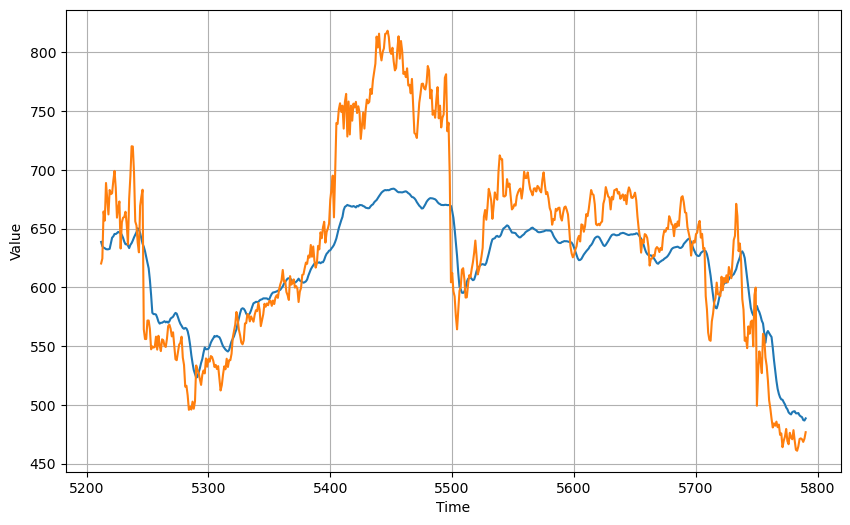

In [31]:
# Plot the results
plot_series(time_valid.index, (results, y_test))

In [32]:
# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(y_test, results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_test, results).numpy())

2271.0474
35.65848


In [33]:
train_results = model.predict(X_train)
train_results = train_results[:,0]

y_train = y_train.to_numpy()
# y_train = y_train[:,0]


163/163 [==============================] - 0s 2ms/step


In [34]:
print(tf.keras.metrics.mean_squared_error(y_train, train_results).numpy())
print(tf.keras.metrics.mean_absolute_error(y_train, train_results).numpy())
# mse much higher here than the linear regression model

647.31354
15.500486
